# MULTIPLE LINEAR REGRESSION MODEL FOR WEIGHT ESTIMATION FROM MEASUREMENTS OF THE FISH AND LOGISTICAL MODEL FOR SPECIE'S  PREDICTION

### Let's start with importing all our required libraries 

In [1]:
import pandas as pd # reading and writing CSV etc 
import numpy as np # handling mathematical functions

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [4]:
df.describe()

,Weight,Height,Width
count,159.000000,159.000000,159.000000
mean,398.326415,8.970994,4.417486
std,357.978317,4.286208,1.685804
min,0.000000,1.728400,1.047600
25%,120.000000,5.944800,3.385650
50%,273.000000,7.786000,4.248500
75%,650.000000,12.365900,5.584500
max,1650.000000,18.957000,8.142000


<AxesSubplot:>

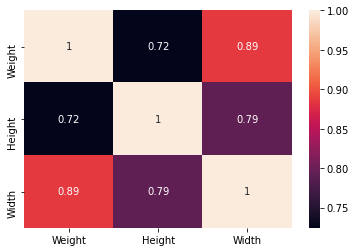

In [5]:
sns.heatmap(df.corr(),annot=True) ## To sns.pairplot(df) check all the correlations present 

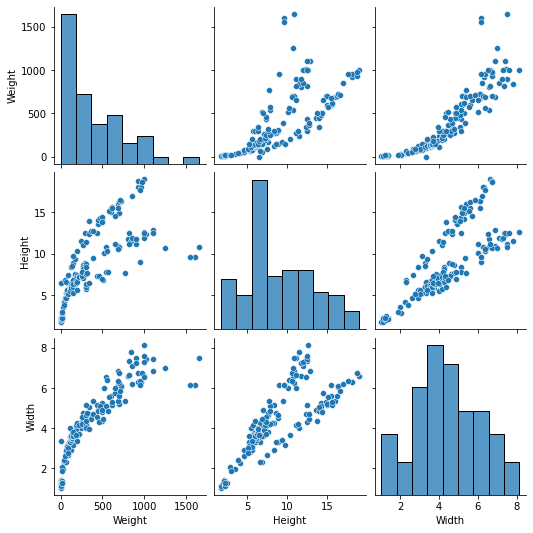

In [6]:
sns.pairplot(df) 

### Let's start with catching outliers 

In [10]:
df_s=df
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [11]:
df_bream=df[df['Species']=='Bream']
df_roach=df[df['Species']=='Roach']
df_whitefish=df[df['Species']=='Whitefish']
df_parkki=df[df['Species']=='Parkki']
df_perch=df[df['Species']=='Perch']
df_pike=df[df['Species']=='Pike']
df_smelt=df[df['Species']=='Smelt']

<AxesSubplot:xlabel='Species', ylabel='Weight'>

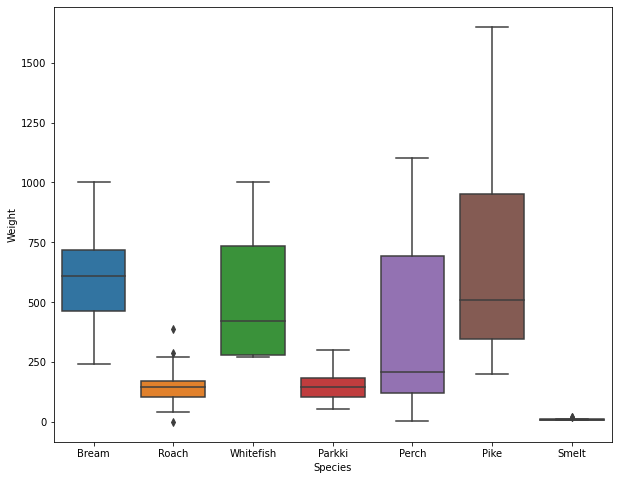

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['Weight'],x=df['Species'])

### Seems like only Roach and Smelt have outliers, so we'll remove them on the basis Z-score and IQR score

In [13]:
z = np.abs(stats.zscore(df_roach.drop('Species',axis=1)))
df_q= df_roach.drop('Species',axis=1)
Q1 =df_q.quantile(0.25)
Q3 = df_q.quantile(0.75)
IQR = Q3 - Q1
df_roach = df_roach[(z < 3).all(axis=1)]
df_roach = df_roach[~((df_roach < (Q1 - 1.5 * IQR)) |(df_roach > (Q3 + 1.5 * IQR))).any(axis=1)]


z = np.abs(stats.zscore(df_smelt.drop('Species',axis=1)))
df_q= df_smelt.drop('Species',axis=1)
Q1 =df_q.quantile(0.25)
Q3 = df_q.quantile(0.75)
IQR = Q3 - Q1
df_smelt = df_smelt[(z < 3).all(axis=1)]
df_smelt = df_smelt[~((df_smelt < (Q1 - 1.5 * IQR)) |(df_smelt > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
d=[df_bream,df_roach,df_whitefish,df_parkki, df_perch,df_pike,df_smelt]
result=pd.concat(d)

    Species  Weight   Height   Width
0     Bream   242.0  11.5200  4.0200
1     Bream   290.0  12.4800  4.3056
2     Bream   340.0  12.3778  4.6961
3     Bream   363.0  12.7300  4.4555
4     Bream   430.0  12.4440  5.1340
..      ...     ...      ...     ...
152   Smelt     9.9   2.2139  1.1659
153   Smelt     9.8   2.2044  1.1484
154   Smelt    12.2   2.0904  1.3936
155   Smelt    13.4   2.4300  1.2690
156   Smelt    12.2   2.2770  1.2558

[152 rows x 4 columns]


### Weight Prediction Model 


In [16]:
X=df_out.drop(['Weight'],axis=1)
y=df_out['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
pre=lr.predict(X_test)
data={'Index':X_test.index,'Actual':y_test.array,'Predicted':pre}
res = pd.DataFrame(data)
res

,Index,Actual,Predicted
0,96,225.0,258.840356
1,69,200.0,278.262968
2,82,110.0,218.331947
3,76,70.0,114.607348
4,114,700.0,678.909707
5,29,1000.0,806.181597
6,94,150.0,224.723779
7,132,430.0,388.784851
8,93,145.0,232.184173
9,139,770.0,514.170958


In [17]:
lr.score(X_test,y_test)

0.8635790946967571

In [18]:
pf=PolynomialFeatures()
quad=pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(quad, y, test_size=0.20, random_state=42)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
data={'Index':y_test.index,'Actual':y_test.array,'Predicted':pred}
res = pd.DataFrame(data)
res

,Index,Actual,Predicted
0,96,225.0,183.927920
1,69,200.0,198.186460
2,82,110.0,177.248912
3,76,70.0,110.364939
4,114,700.0,659.727794
5,29,1000.0,1009.210152
6,94,150.0,197.781800
7,132,430.0,326.142440
8,93,145.0,184.418764
9,139,770.0,482.095431


In [19]:
lr.score(X_test,y_test)

0.9446392312144187

In [20]:
cross_val_score_train = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.87798031 0.85945939 0.88668121 0.93914066 0.96264172 0.97143011
 0.69507255 0.8940508  0.96429861 0.97028901]


## For Species Prediction

In [21]:
X=result.drop(['Species'],axis=1)
y=result['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logr = LogisticRegression()
logr.fit(X_train,y_train)
pre=logr.predict(X_test)
data={'Index':X_test.index,'Actual':y_test.array,'Predicted':pre}
res=pd.DataFrame(data)
res

C:\Users\ismis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Index,Actual,Predicted
0,73,Perch,Roach
1,152,Smelt,Smelt
2,101,Perch,Perch
3,87,Perch,Perch
4,140,Pike,Pike
5,144,Pike,Pike
6,26,Bream,Bream
7,12,Bream,Bream
8,18,Bream,Bream
9,15,Bream,Bream


In [22]:
logr.score(X_test,y_test)

0.7419354838709677